### The XOR-Model ###

We will build our tiny neural network predicting the XOR-data in keras

First of all, we need to import the libraries

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


We need to define simple datas.


In [2]:
#Input datasets
x_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([[0],[1],[1],[0]])



Now we set up our parameters - and define the model, exactly as in the lecture slides

TODO: Show different way to set up the model, with and without Input layer

In [6]:
# Set up your model here :
x_train.shape
y_train.flatten().shape
y_train.reshape(1, -1).shape


(1, 4)

In [7]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(500, activation='relu', input_dim=2))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation="relu"))
model.add(Dense(2, activation="softmax"))



In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])


We already have compiled our model - now we need to train it. We also need to get some predictions in order to see whether our model can indeed predict the XOR-data

In [9]:
# Train your model here, and predict the XOR-data :
model.fit(x_train, y_train.flatten(), epochs=10)


Epoch 1/10


1/1 [==============================] - 1s 1s/step - loss: 0.6874 - accuracy: 0.7500
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6703 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6579 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6454 - accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6331 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6219 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6105 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 0.5971 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 0.5833 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 0.5689 - accuracy: 1.0000


Predictions



In [10]:
# Please display predicted values :
model.predict(x_train)


1/1 [==============================] - 0s 196ms/step


array([[0.5083404 , 0.49165964],
       [0.40552777, 0.5944722 ],
       [0.39357713, 0.60642284],
       [0.5952689 , 0.40473107]], dtype=float32)

In [12]:
import pandas as pd
predictionsFinale = []
for ligne in model.predict(x_train):
  if ligne[0] > ligne[1]:
    predictionsFinale.append([0, ligne[0]])
  else:
    predictionsFinale.append([1, ligne[1]])

df = pd.DataFrame(predictionsFinale, columns=["predictions", "probabilités"])
df


1/1 [==============================] - 0s 87ms/step


,predictions,probabilités
0,0,0.508340
1,1,0.594472
2,1,0.606423
3,0,0.595269


In [13]:

print("Les prédictions :", df.predictions.values)


Les prédictions : [0 1 1 0]


Let's compare the predictions to the true labels, do you notice a "type" difference ?

In [11]:
print("Les valeurs réelles :", y_train.flatten())


Les valeurs réelles : [0 1 1 0]


In [ ]:
# le modele predit bien les bonnes valeurs


This takes ridicuously long! Let's try to get the training faster. But first of all - and in order to "measure" how long the training takes, implement some code which stores the epoch at which the Neural Network has stably reached 100 percent accuracy. Stably means that the accuracy does not jump back to less then 100 percent. There are keras callbacks - and you could write a custom callback. But for now, you can also write a loop - in which the model is trained for one epoch at every iteration. You should store the accuracies at each epoch in a list in order to be able to visualize them.

Do not alter the cost function!

Hint: Good code style would be to put the model set up into a function and also the code to get the accuracy

You should get someting like this format :
* Epoch 0 / 200    accuracy: 0.5
* Epoch 20 / 200    accuracy: 0.5
* Epoch 40 / 200    accuracy: 0.5
* Epoch 60 / 200    accuracy: 0.5



In [ ]:
# # function for model-set-up
# def build_model():
#   # Layers

#   # Learning rate

#   # Optimizer

#   # Compile

#   return model



In [31]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from tqdm import tqdm

# Création du modèle
def create_model():
    model = Sequential([
        Dense(500, activation='relu', input_dim=2),
        Dense(100, activation='relu'),
        Dense(50, activation='relu'),
        Dense(2, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Données d'entraînement XOR
x_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([[0],[1],[1],[0]])

# Initialisation du modèle
model = create_model()

# Liste pour enregistrer la précision
accuracies = []

# Utilisation simple de tqdm
for epoch in tqdm(range(200), desc='Training Progress'):
    # Entraînement du modèle pour une époque
    model.fit(x_train, y_train, epochs=1, verbose=0)
    # Évaluation de la précision
    loss, accuracy = model.evaluate(x_train, y_train, verbose=0)
    accuracies.append(accuracy)
    # Affichage de la précision à chaque 20ème époque
    if epoch % 20 == 0:
        print(f'Epoch {epoch} / 200    accuracy: {accuracy}')


Training Progress:   0%|          | 0/200 [00:00<?, ?it/s]

Training Progress:   1%|          | 2/200 [00:01<01:58,  1.67it/s]

Epoch 0 / 200    accuracy: 0.75


Training Progress:  11%|█         | 22/200 [00:04<00:28,  6.23it/s]

Epoch 20 / 200    accuracy: 1.0


Training Progress:  21%|██        | 42/200 [00:07<00:23,  6.63it/s]

Epoch 40 / 200    accuracy: 1.0


Training Progress:  31%|███       | 62/200 [00:10<00:21,  6.53it/s]

Epoch 60 / 200    accuracy: 1.0


Training Progress:  41%|████      | 82/200 [00:13<00:18,  6.43it/s]

Epoch 80 / 200    accuracy: 1.0


Training Progress:  51%|█████     | 102/200 [00:17<00:14,  6.62it/s]

Epoch 100 / 200    accuracy: 1.0


Training Progress:  61%|██████    | 122/200 [00:20<00:11,  6.56it/s]

Epoch 120 / 200    accuracy: 1.0


Training Progress:  71%|███████   | 142/200 [00:23<00:08,  6.48it/s]

Epoch 140 / 200    accuracy: 1.0


Training Progress:  81%|████████  | 162/200 [00:26<00:05,  6.70it/s]

Epoch 160 / 200    accuracy: 1.0


Training Progress:  91%|█████████ | 182/200 [00:29<00:02,  6.57it/s]

Epoch 180 / 200    accuracy: 1.0


Training Progress: 100%|██████████| 200/200 [00:32<00:00,  6.21it/s]


In [14]:
# function for model-set-up
def build_model(X, y, epochs=200):
  from keras.models import Sequential
  from keras.layers import Dense
  from keras.callbacks import LearningRateScheduler
  import keras

  # Layers
  model = Sequential()
  model.add(Dense(50, activation='relu', input_dim=2))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(50, activation="relu"))
  model.add(Dense(2, activation="softmax"))

  # Création d'une fonction call back qui va être appelé après chaque epoch
  # On crée une liste qui récupérera les valeurs d'accuracy
  accuracys = []
  # La classe callback de keras qui doit hériter de keras.callbacks.Callback
  class CustomCallback(keras.callbacks.Callback):
    # https://keras.io/guides/writing_your_own_callbacks/
    # Le nom on_epoch_end est reconnu par keras, il va lancer la fonction à la fin de chaque epoch
    # La fonction récupère l'accuracy
    def on_epoch_end(self, accuracy, logs=None):
      #keys = list(logs.keys())
      # on ajoute l'accuracy récupéré à la fin de chaque tour dans la liste
      accuracys.append(logs['accuracy'])
      # Si elle est à 100% (1.0)
      if logs['accuracy'] == 1.0:
        # On arrête l'apprentissage
        self.model.stop_training = True
      #print(f"\nAccuracy ! >>> {logs['accuracy']}")
      # Ensuite on retourne la liste des accuracy
      return accuracys

  # Learning rate
  learning_rate = 0.01

  # Optimizer
  opt = keras.optimizers.Adam(learning_rate=learning_rate)

  # Compile

  model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

  model.fit(X, y, epochs=epochs, callbacks=[CustomCallback()])

  return model, accuracys


In [15]:
model, accuracy = build_model(x_train, y_train.flatten(), epochs=200)


Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 0.7045 - accuracy: 0.7500
Epoch 2/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6804 - accuracy: 0.5000
Epoch 3/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6574 - accuracy: 0.5000
Epoch 4/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6358 - accuracy: 1.0000


In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
import keras
#import tensorflow_addons as tfa


# Layers
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=2))
model.add(Dense(10, activation='relu'))
model.add(Dense(50, activation="relu"))
model.add(Dense(2, activation="softmax"))

# Learning rate
learning_rate = 0.01

# Optimizer
opt = keras.optimizers.Adam(learning_rate=learning_rate)

# Compile

model.compile(optimizer=opt,
            loss='sparse_categorical_crossentropy',
            metrics=["accuracy"])

X = x_train
y = y_train.flatten()

def fit_model_and_get_accuracy(model, epochs=60, epoch_log_step=20):
  model.fit(X, y, epochs=epochs, steps_per_epoch=epoch_log_step)
  accuracies_list = model.history.history["accuracy"]
  return accuracies_list

fit_model_and_get_accuracy(model)


Epoch 1/60
20/20 [==============================] - 1s 2ms/step - loss: 0.6581 - accuracy: 0.6500
Epoch 2/60
20/20 [==============================] - 0s 1ms/step - loss: 0.4858 - accuracy: 0.9000
Epoch 3/60
20/20 [==============================] - 0s 1ms/step - loss: 0.2145 - accuracy: 1.0000
Epoch 4/60
20/20 [==============================] - 0s 1ms/step - loss: 0.0355 - accuracy: 1.0000
Epoch 5/60
20/20 [==============================] - 0s 1ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 6/60
20/20 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 7/60
20/20 [==============================] - 0s 1ms/step - loss: 9.1319e-04 - accuracy: 1.0000
Epoch 8/60
20/20 [==============================] - 0s 1ms/step - loss: 4.5948e-04 - accuracy: 1.0000
Epoch 9/60
20/20 [==============================] - 0s 1ms/step - loss: 2.6921e-04 - accuracy: 1.0000
Epoch 10/60
20/20 [==============================] - 0s 1ms/step - loss: 1.9072e-04 - accuracy: 1.0000
Epo

[0.6499999761581421,
 0.8999999761581421,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0]

## First Simple Reference Model (hidden_shape = 2, hidden_size = 1)

In [34]:
# Use your functions to execute your script

# Use your functions to execute your script

# function for model-set-up
def build_model(X, y, epochs=200):
  from keras.models import Sequential
  from keras.layers import Dense
  from keras.callbacks import LearningRateScheduler
  import keras

  # Layers
  model = Sequential()
  model.add(Dense(50, activation='relu', input_dim=2))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(21, activation="relu"))
  model.add(Dense(2, activation="softmax"))

  # Fonction call back
  accuracys = []
  class CustomCallback(keras.callbacks.Callback):
    # https://keras.io/guides/writing_your_own_callbacks/
    def on_epoch_end(self, accuracy, logs=None):
      #keys = list(logs.keys())
      accuracys.append(logs['accuracy'])
      if logs['accuracy'] == 1.0:
        self.model.stop_training = True
      #print(f"\nAccuracy ! >>> {logs['accuracy']}")
      return accuracys

  # Learning rate
  learning_rate = 0.01

  # Optimizer
  opt = keras.optimizers.Adam(learning_rate=learning_rate)

  # Compile

  model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

  model.fit(X, y, epochs=epochs)

  return model, accuracys


## More complex models

Okay, now let's get startet. Make a note of your accuracy == 1.0 epoch. It is your baseline. And then try to alter the model so that it trains faster. These are the hyperparameters you need to optimize - but feel free to add others!

1) Hidden size

2) Number of hidden layers

3) Learning rate - just try different numbers
   What happens if the learning rate is too big?

4) Learning rate - try to decrease it during the training process

5) Different optimizers



For the eager ones: The weights are initialized randomly (within limits) - so if you want better results and insights into the effect of different hyperparameters, you would have to run each experiment a couple of times (i.e. 5 to 10 minimum) and average over them. But you may ignore this in this quest - just bear it in mind!


In [35]:
# Hidden Size


# Number of hidden layers

# Learning rate

# Learning rate - continuous decrease

# Optimizers
model, accuracy = build_model(x_train, y_train.flatten(), epochs=200)
accuracy


Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.6688 - accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6501 - accuracy: 0.7500
Epoch 3/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6173 - accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 5ms/step - loss: 0.5753 - accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 5ms/step - loss: 0.5360 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 5ms/step - loss: 0.4946 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 6ms/step - loss: 0.4488 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 5ms/step - loss: 0.4009 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 6ms/step - loss: 0.3545 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 5ms/step - loss: 0.3111 - accuracy: 1.0000
Epoch 11/200
1/1 [============

[]

Now visualize all your learning curves - i.e. nr. of epochs against accuracy. Which hyperparameter did have the biggest effect?

Hint: In order to do that systematically, you could save the list of accuracies for each experiment and then display them all in one graph (at least for each tuned hyperparameter)

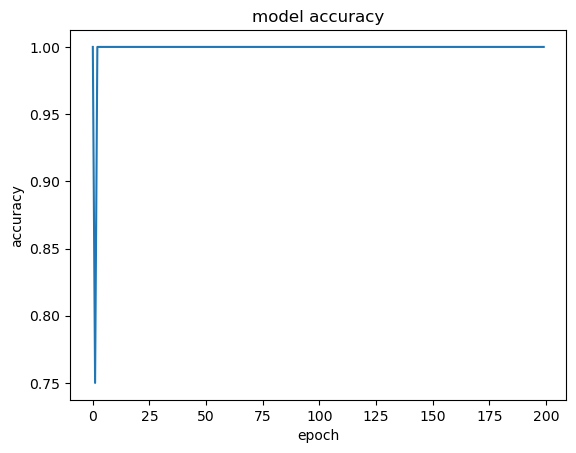

In [36]:
# Here go the plots
import matplotlib.pyplot as plt


plt.plot(model.history.history['accuracy'])
#plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()


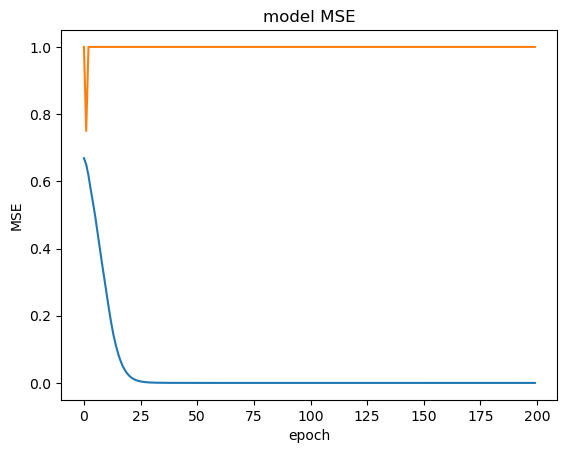

In [38]:
# More plots
import matplotlib.pyplot as plt


plt.plot(model.history.history['loss'])
plt.plot(model.history.history['accuracy'])
#plt.plot(model.history.history['val_accuracy'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()



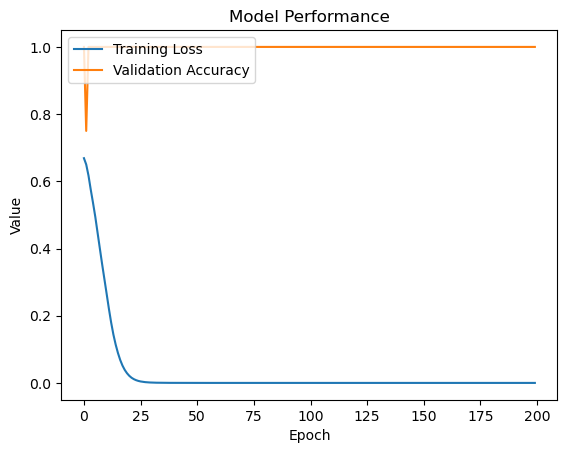

In [41]:
# Add as many plots as you want
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['accuracy'], label='Validation Accuracy')
plt.title('Model Performance')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


We are still working with mean_squared_error as a cost-function. What would be a more suitable cost function?

Alter the cost function and see how fast you get to a stable accuracy of 1.0.


In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import BinaryCrossentropy
from tqdm import tqdm

# Création du modèle pour la classification binaire
def create_binary_model():
    model = Sequential([
        Dense(500, activation='relu', input_dim=2),
        Dense(100, activation='relu'),
        Dense(50, activation='relu'),
        Dense(1, activation='sigmoid')  # Un seul neurone avec activation sigmoid
    ])

    model.compile(optimizer='adam',
                  loss=BinaryCrossentropy(),  # Utiliser binary_crossentropy
                  metrics=['accuracy'])
    return model

# Données d'entraînement XOR (reste inchangé)
x_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([0, 1, 1, 0])  # Adapté pour la classification binaire

# Initialisation du modèle
model = create_binary_model()

# Boucle d'entraînement avec tqdm pour suivre la progression
pbar = tqdm(total=200, desc='Training Progress')

stable_epoch = None
for epoch in range(200):
    model.fit(x_train, y_train, epochs=1, verbose=0)
    loss, accuracy = model.evaluate(x_train, y_train, verbose=0)
    pbar.update(1)
    if accuracy == 1.0:
        if stable_epoch is None:
            stable_epoch = epoch
        elif epoch - stable_epoch > 10:  # Stable pour plus de 10 époques
            pbar.write(f'Stable accuracy of 1.0 reached at epoch {stable_epoch}')
            break
    else:
        stable_epoch = None


pbar.close()


Training Progress:   9%|▉         | 18/200 [00:03<00:40,  4.54it/s]

Stable accuracy of 1.0 reached at epoch 6


In [44]:
plt.plot(model.history.history[loss], label='Training Loss')
plt.plot(model.history.history[accuracy], label='Validation Accuracy')
plt.title('Model Performance')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


KeyError: 0.45538201928138733

What is your best score (epoch with accuracy == 1.0)?

Can you get the score to under 100?

What might be the problem with your best model?

Answer all these questions in the text cell below

test avec 120 epochs

Epoch 1/120
1/1 - 2s - loss: 0.5965 - binary_accuracy: 0.7500 - 2s/epoch - 2s/step
Epoch 2/120
1/1 - 0s - loss: 0.5943 - binary_accuracy: 0.7500 - 6ms/epoch - 6ms/step
Epoch 3/120
1/1 - 0s - loss: 0.5918 - binary_accuracy: 0.7500 - 5ms/epoch - 5ms/step
Epoch 4/120
1/1 - 0s - loss: 0.5893 - binary_accuracy: 0.7500 - 5ms/epoch - 5ms/step
Epoch 5/120
1/1 - 0s - loss: 0.5869 - binary_accuracy: 0.7500 - 5ms/epoch - 5ms/step
Epoch 6/120
1/1 - 0s - loss: 0.5846 - binary_accuracy: 0.7500 - 6ms/epoch - 6ms/step
Epoch 7/120
1/1 - 0s - loss: 0.5822 - binary_accuracy: 0.7500 - 5ms/epoch - 5ms/step
Epoch 8/120
1/1 - 0s - loss: 0.5799 - binary_accuracy: 0.7500 - 5ms/epoch - 5ms/step
Epoch 9/120
1/1 - 0s - loss: 0.5776 - binary_accuracy: 0.7500 - 6ms/epoch - 6ms/step
Epoch 10/120
1/1 - 0s - loss: 0.5753 - binary_accuracy: 0.7500 - 6ms/epoch - 6ms/step
Epoch 11/120
1/1 - 0s - loss: 0.5730 - binary_accuracy: 0.7500 - 6ms/epoch - 6ms/step
Epoch 12/120
1/1 - 0s - loss: 0.5707 - binary_accuracy: 0.7500 - 

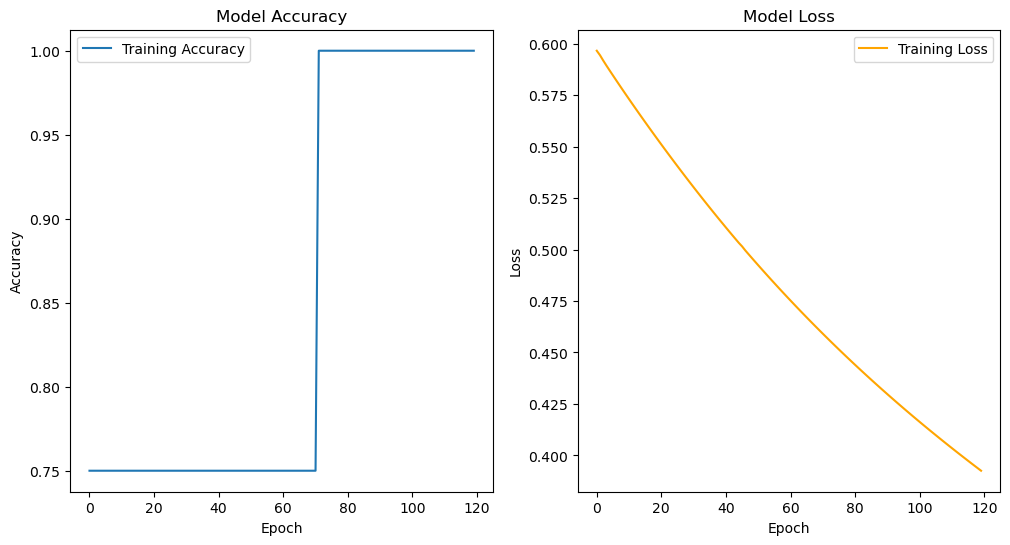

In [61]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

# Préparation des données
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], "float32")
Y = np.array([[0], [1], [1], [0]], "float32")

# Création du modèle
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(BatchNormalization())  # Ajout de la normalisation par lots
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle avec un taux d'apprentissage plus petit
optimizer = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['binary_accuracy'])

# Callback EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=10)

# Entraînement du modèle avec le callback EarlyStopping
history = model.fit(X, Y, epochs=120, verbose=2, callbacks=[early_stopping])

# Graphique de la précision et de la perte
plt.figure(figsize=[12,6])

# Sous-graphique 1 pour l'accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['binary_accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Sous-graphique 2 pour la perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='orange')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


### Approche avec un autre type de modele que séquential,  15 epoch!!

Input : Utilisé pour instancier un tenseur d’entrée Keras, point de départ de tout modèle Keras.

Dense : Implémente l’opération : output = activation(dot(input, kernel) + bias) où activation est la fonction d’activation à appliquer, kernel est une matrice de poids créée par la couche, et bias est un vecteur de biais créé par la couche.

Essai concluant avec suelement 15 epoch !!!, le choix du modele est donc primordial

Epoch 1/10
1/1 - 1s - loss: 0.6920 - accuracy: 0.7500 - 1s/epoch - 1s/step
Epoch 2/10
1/1 - 0s - loss: 0.6738 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
Epoch 3/10
1/1 - 0s - loss: 0.6600 - accuracy: 0.7500 - 5ms/epoch - 5ms/step
Epoch 4/10
1/1 - 0s - loss: 0.6484 - accuracy: 0.7500 - 5ms/epoch - 5ms/step
Epoch 5/10
1/1 - 0s - loss: 0.6398 - accuracy: 0.7500 - 5ms/epoch - 5ms/step
Epoch 6/10
1/1 - 0s - loss: 0.6312 - accuracy: 1.0000 - 5ms/epoch - 5ms/step
Epoch 7/10
1/1 - 0s - loss: 0.6235 - accuracy: 1.0000 - 5ms/epoch - 5ms/step
Epoch 8/10
1/1 - 0s - loss: 0.6162 - accuracy: 1.0000 - 6ms/epoch - 6ms/step
Epoch 9/10
1/1 - 0s - loss: 0.6095 - accuracy: 1.0000 - 5ms/epoch - 5ms/step
Epoch 10/10
1/1 - 0s - loss: 0.6027 - accuracy: 1.0000 - 5ms/epoch - 5ms/step
1/1 [==============================] - 0s 99ms/step
[[0.]
 [1.]
 [1.]
 [0.]]


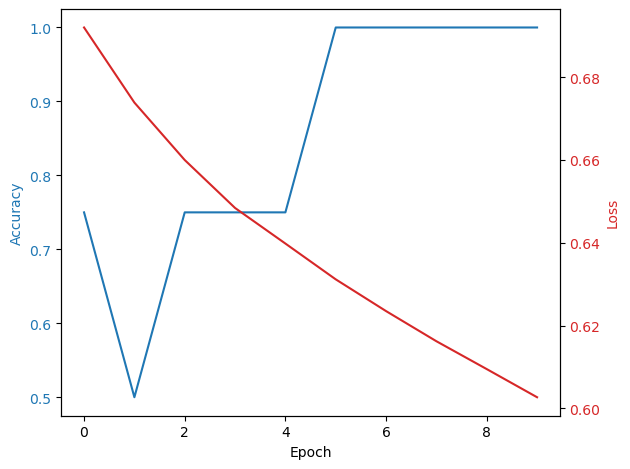

In [68]:
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

# Préparation des données
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])


# Cela retourne un tenseur
inputs = Input(shape=(2,))

# Une couche est une fonction
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Ceci crée un modèle qui inclut
# le réseau d'entrées et de trois couches de Dense
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 'val_loss' est la valeur de la fonction de perte sur l'ensemble de validation
early_stopping = EarlyStopping(monitor='loss', patience=10)

# Entraînement du modèle
history = model.fit(X, y, epochs=10, verbose=2,callbacks=[early_stopping])

# Test du modèle
print(model.predict(X).round())

# Création d'une figure et d'un axe
fig, ax1 = plt.subplots()

# Tracé de la précision
color = 'tab:blue'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(history.history['accuracy'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Création d'un deuxième axe partageant le même axe des x
ax2 = ax1.twinx()

# Tracé de la perte
color = 'tab:red'
ax2.set_ylabel('Loss', color=color)
ax2.plot(history.history['loss'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Affichage du graphique
fig.tight_layout()
plt.show()


My conclusion about these experiments is:

atteindre une précision de 1.0 rapidement est  possible pour  XOR, mais il est important de veiller à ce que le modèle ne soit pas trop complexe pour la tâche à accomplir, afin d'éviter des problèmes comme le overfiting.